# Proceso de Ornstein-Uhlenbeck
Josué
---

Es el proceso $X(t)$ tal que
$$dX(t) = k(\theta - X(t))dt + \sigma dW(t), \quad k,\sigma > 0, \theta \in \mathbb{R}.$$

La solución es
$$X(T) = e^{-k(T-t)} X(t) + \theta (1 - e^{-k(T-t)}) + \sigma e^{-kT} \int_{t}^{T} e^{ks}dW(s), \quad t \in [0,T],$$
en particular para $t=0$ y $X(0) = X_0$:
$$X(t) = e^{-kt} X_0 + \theta (1 - e^{-kt}) + \sigma e^{-kt} \int_{0}^{t} e^{ks}dW(s), \quad t \in [0,T],$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100.
n = 150
k = 0.025
sigma = 0.3
tht = 3.
X0 = 10.

t, dt = np.linspace(0,T,num=n,retstep=True)

X = np.zeros(n)
X[0] = X0

In [3]:
def Integral(T):
    n = 10000 #num de particiones para la integral de 0 a T
    t, dt = np.linspace(0,T,num=n,retstep=True)
    
    W = np.random.normal(0,np.sqrt(dt), n-1) 
    W = np.insert(W, 0, 0)
    W = np.cumsum(W)
    
    s = 0
    for i in range(0,n-1):
        s += np.exp(k*t[i])*(W[i+1] - W[i])
        
    return s

In [4]:
vint = np.vectorize(Integral) #es la función integral vectorizada

In [5]:
X = np.exp(-k*t)*X0 + tht*(1-np.exp(-k*t)) + sigma*np.exp(-k*t)*vint(t)

Text(0.5, 1.0, 'Una realización de Ornstein-Uhlenbeck')

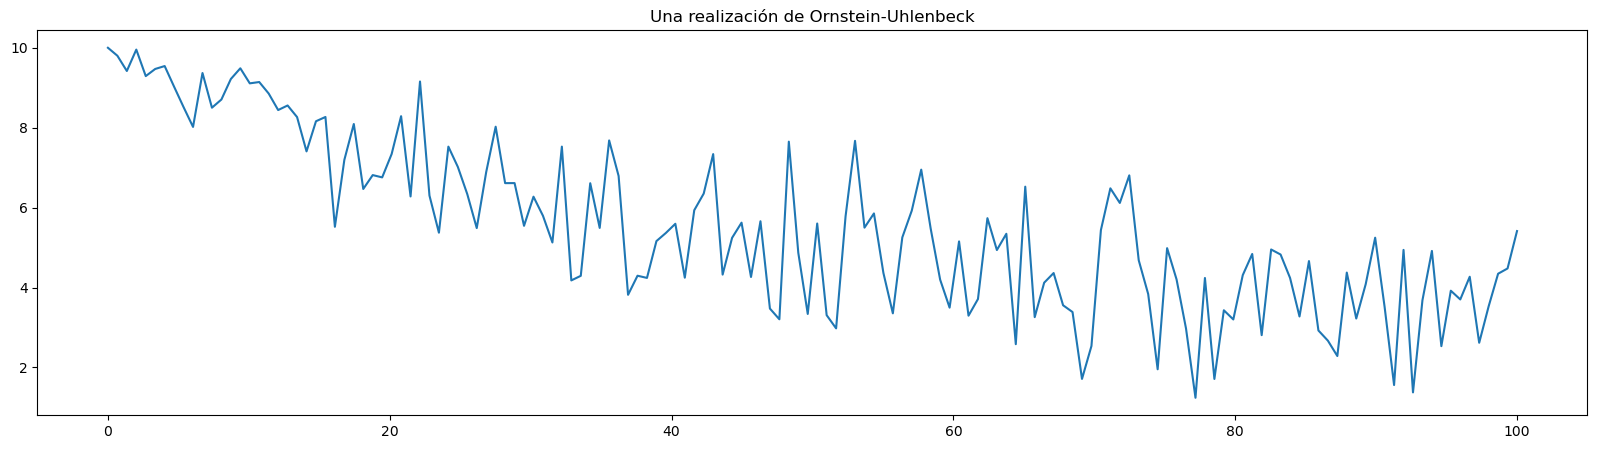

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(t,X)
plt.title("Una realización de Ornstein-Uhlenbeck")

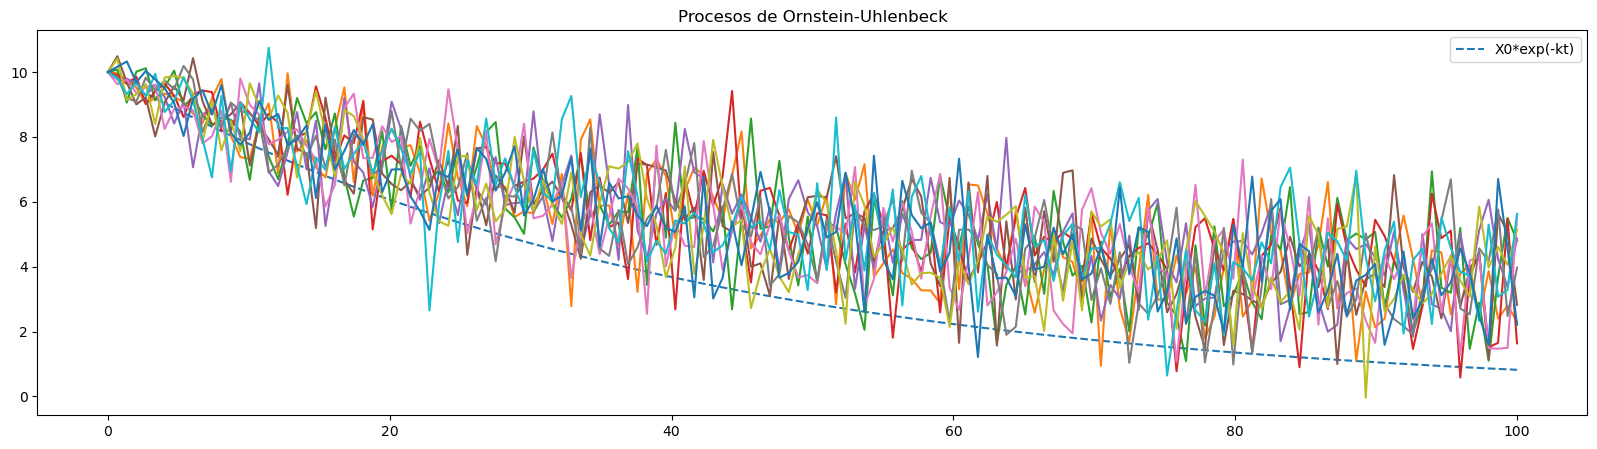

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(t,X0*np.exp(-k*t), "--", label="X0*exp(-kt)")

for i in range(0,10): #10 simulaciones
    X = np.exp(-k*t)*X0 + tht*(1-np.exp(-k*t)) + sigma*np.exp(-k*t)*vint(t)
    plt.plot(t,X)
    
plt.title("Procesos de Ornstein-Uhlenbeck")
plt.legend(loc='best')
plt.show()

El término $x_0 exp(-kt)$ corresponde a la esperanza del proceso. Dado que la integral va perdiendo precisión conforme avanza $t$, las simulaciones se van despegando de su valor esperado conforme avanxa el tiempo.